In [16]:
config = {'model': {'base_learning_rate': 4.5e-06, 'target': 'taming.models.vqgan.VQModel', 'params': {'embed_dim': 256, 'n_embed': 16384, 'monitor': 'val/rec_loss', 'ddconfig': {'double_z': False, 'z_channels': 256, 'resolution': 256, 'in_channels': 3, 'out_ch': 3, 'ch': 128, 'ch_mult': [1, 1, 2, 2, 4], 'num_res_blocks': 2, 'attn_resolutions': [16], 'dropout': 0.0}, 'lossconfig': {'target': 'taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminator', 'params': {'disc_conditional': False, 'disc_in_channels': 3, 'disc_start': 0, 'disc_weight': 0.75, 'disc_num_layers': 2, 'codebook_weight': 1.0}}}}}

In [17]:
model = VQModel(ddconfig = config["model"]["params"]["ddconfig"], lossconfig = config["model"]["params"]["lossconfig"], embed_dim = 256, n_embed = 16384)

/home/ubuntu/anaconda3/envs/muse/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/muse/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


In [18]:
model.init_from_ckpt(path = "../model.ckpt")

Restored from  ../model.ckpt


In [19]:
from PIL import Image

In [20]:
inp = Image.open("../4.jpg")

In [21]:
import torchvision.transforms as T
from einops import rearrange
import matplotlib.pyplot as plt

In [22]:
tensor_inp = T.Resize((512, 512))(T.ToTensor()(inp)).unsqueeze(0)

In [23]:
encoded, loss, indices = model.encode(tensor_inp)

In [24]:
from_vq = rearrange(model.quantize.embedding(indices).view((1, 32, 32, 256)), "b h w c -> b c h w")

In [25]:
decoded = model.decode(from_vq)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


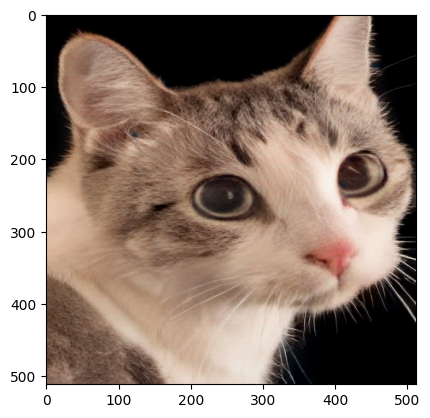

In [26]:
plt.imshow(decoded[0].permute(1, 2, 0).detach())

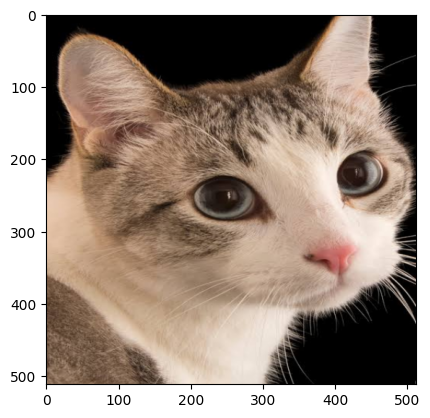

In [27]:
plt.imshow(tensor_inp[0].permute(1, 2, 0))